In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_csv = "clean_data.csv"
data_df = pd.read_csv(data_csv)
data_df.head()

,Unnamed: 0,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker
0,0,4.0,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0
1,1,4.0,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0
2,2,4.0,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0
3,4,2.0,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0
4,5,3.0,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0


In [3]:
data_df['General Health'].value_counts()

# Labels for values
data_df["General Health Category"] = data_df["General Health"].map(lambda x: 
                                                 "1 Poor" if x == 1 else 
                                                 ("2 Fair" if x == 2 else
                                                  ("3 Good" if x == 3 else
                                                   ("4 Very Good" if x == 4 else
                                                    ( "5 Excellent")))))

data_df["Fruit & Veg Servings"] = data_df["Eaten Fruits or Veggies Yesterday"].map(lambda x: 
                                                 "None" if x == 1 else 
                                                 ("1-4 servings" if x == 2 else
                                                  (">=5 servings")))

data_df["Exercise Y/N"] = data_df["Exercise"].map(lambda x: "No" if x == 0 else "Yes")

data_df["Gender"] = data_df["Sex"].map(lambda x: "Female" if x == 0 else "Male")

data_df["Age Category"] = data_df["Age Group"].map(lambda x: 
                                                 "18-24yrs" if x == 1 else 
                                                 ("25-29 yrs" if x == 2 else
                                                  ("30-44 yrs" if x == 3 else
                                                   ("45-64 yrs" if x == 4 else
                                                    ("65+ yrs")))))

data_df = data_df.sort_values('General Health',ascending=True)
data_df.head()

,Unnamed: 0,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,General Health Category,Fruit & Veg Servings,Exercise Y/N,Gender,Age Category
5148,5585,1.0,3.0,2.0,3.0,3,1.0,1.0,1.0,0,1.0,1.0,1 Poor,1-4 servings,Yes,Female,30-44 yrs
6186,6757,1.0,3.0,2.0,5.0,3,1.0,1.0,1.0,0,0.0,0.0,1 Poor,1-4 servings,Yes,Female,65+ yrs
771,821,1.0,2.0,2.0,5.0,1,2.0,1.0,0.0,1,1.0,1.0,1 Poor,1-4 servings,No,Male,65+ yrs
3217,3455,1.0,3.0,2.0,4.0,3,2.0,1.0,0.0,0,0.0,0.0,1 Poor,1-4 servings,No,Female,45-64 yrs
6198,6771,1.0,3.0,2.0,5.0,3,2.0,1.0,0.0,1,0.0,0.0,1 Poor,1-4 servings,No,Male,65+ yrs


In [4]:
#Get counts
gender_count = data_df["Gender"].value_counts()
print(gender_count)
diet_count = data_df["Fruit & Veg Servings"].count()
print(diet_count)
workout_count = data_df["Exercise Y/N"].value_counts()
print(workout_count)
age_count = data_df["Age Category"].value_counts()
print(age_count)

Female    4550
Male      3363
Name: Gender, dtype: int64
7913
Yes    6019
No     1894
Name: Exercise Y/N, dtype: int64
45-64 yrs    2998
30-44 yrs    2061
65+ yrs      1651
18-24yrs      606
25-29 yrs     597
Name: Age Category, dtype: int64


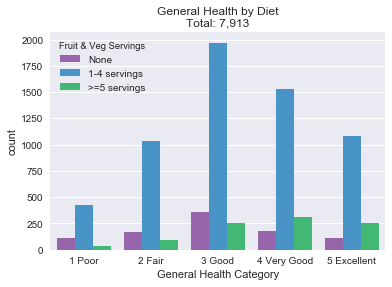

In [5]:
#Diet graph
sns.set(style="darkgrid")
flatui = ["#9b59b6", "#3498db","#2ecc71"]
sns.countplot(x="General Health Category", hue="Fruit & Veg Servings",data=data_df,palette=flatui,hue_order=["None","1-4 servings",">=5 servings"]).set_title("General Health by Diet\nTotal: 7,913")
plt.savefig("fruitveggie.png")

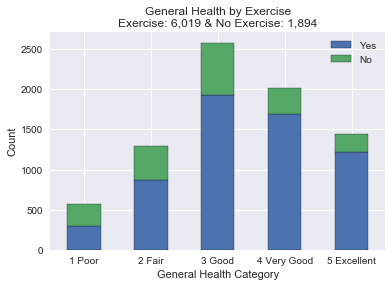

In [6]:
#Exercise Graph
grouped_gender = data_df.groupby(['General Health Category','Exercise Y/N'])['General Health Category'].count().unstack('Exercise Y/N')
grouped_gender[['Yes','No']].plot(kind='bar',edgecolor="black",stacked=True)

plt.ylabel("Count")
plt.title("General Health by Exercise\nExercise: 6,019 & No Exercise: 1,894")
plt.legend (loc = "upper right")
plt.xticks(rotation=0)
plt.show()
plt.savefig("exercisestack.png")

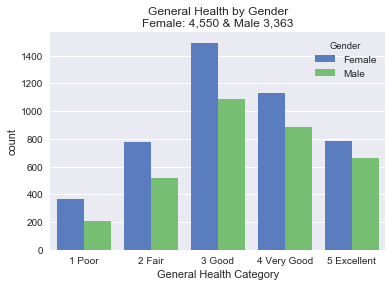

In [7]:
#Gender Graph
sns.countplot(x="General Health Category", hue="Gender",palette="muted", data=data_df).set_title("General Health by Gender\nFemale: 4,550 & Male 3,363")
plt.savefig("gendersbs.png")